# Simulaciones

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.cm as cm
import rie_estimator
import pandas as pd
from matplotlib.pyplot import figure

In [132]:
figure(figsize=(8, 10), dpi=80)


<Figure size 640x800 with 0 Axes>

<Figure size 640x800 with 0 Axes>

## Función para generar dinámicamente una matriz en bloques (diagonales son cero)

In [3]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

### ejemplos

In [3]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [4]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [5]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
#number_of_obs = 500
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
number_of_obs = 900
number_of_assets = corr_matrix.shape[0]
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)

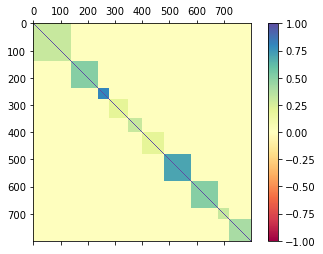

In [6]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [7]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(720000,)

In [8]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(800, 900)

In [9]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(800, 800)

In [10]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

In [11]:
sample_corr = np.corrcoef(daily_returns)

In [12]:
rie_corr = rie_estimator.get_rie(returns=daily_returns.T, normalize=False, max_ones= False)

In [13]:
daily_returns.min()

-4.923115972522943

In [14]:
daily_returns.mean()

0.006236151373710868

In [15]:
daily_returns.max()

4.294852896720483

<AxesSubplot:ylabel='Density'>

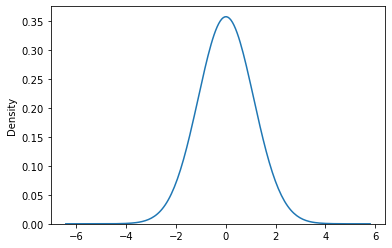

In [16]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

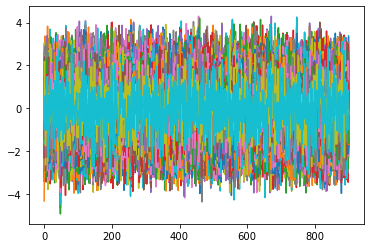

In [17]:
plt.plot(daily_returns.T);

In [18]:
daily_returns.shape

(800, 900)

Mostrando el estimador de correlación muestral

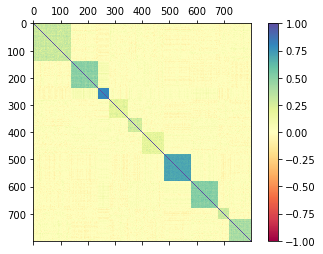

In [19]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(sample_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

Mostrando el estimador de correlación del RIE:

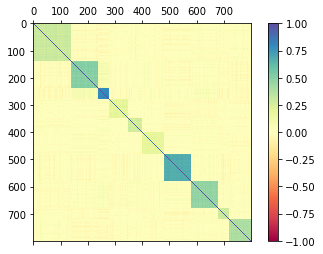

In [20]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [21]:
print(np.linalg.norm(((corr_matrix - sample_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.03520352205545
22.313673525610174


## TODO
- Distancia de frobenius promedio (sobre distintas realizaciones)
- Gráfica de mapeo de los valores propios ( es equivalente)
- Se pueden mostrar escenarios distintos (tanto en el número de bloques, q)

## Simulando retornos con una normal mutlivariada

In [4]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])

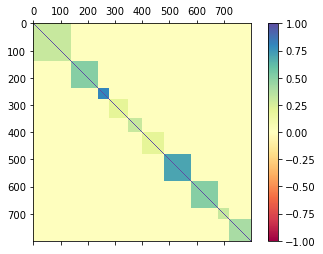

In [23]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [22]:
daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=800)

In [23]:
daily_returns.shape

(800, 800)

In [24]:
est_corr = np.corrcoef(daily_returns.T)

In [27]:
rie_corr = rie_estimator.get_rie(returns=pd.DataFrame(daily_returns), normalize=True, max_ones= False)

/home/dum/Documents/rie_estimator/rie_estimator.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sq = (n_lambda)/(1 - np.sqrt(q))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_plus = n_lambda*((1+np.sqrt(q))/(1 - np.sqrt(q)))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in double_scalars
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in true_divide
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)


In [28]:
np.isnan(rie_corr).sum()

0

<AxesSubplot:ylabel='Density'>

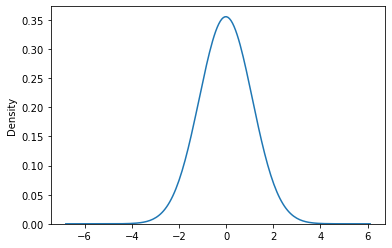

In [28]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

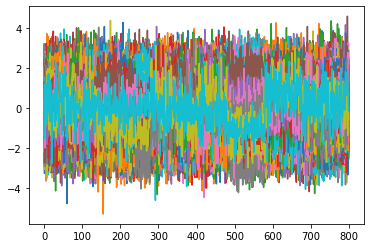

In [29]:
plt.plot(daily_returns.T);

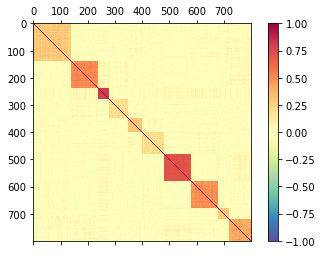

In [30]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(est_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

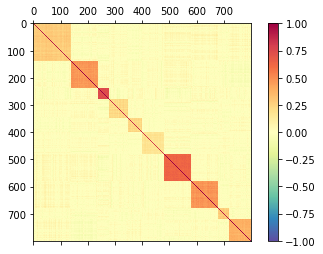

In [29]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

In [30]:
print(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

28.759808196307283
24.620270494914955


In [31]:
eigen_true = np.linalg.eigvalsh(corr_matrix)
eigen_sample = np.linalg.eigvalsh(est_corr)
eigen_rie = np.linalg.eigvalsh(rie_corr)
eigen_true.sort()
eigen_sample.sort()
eigen_rie.sort()


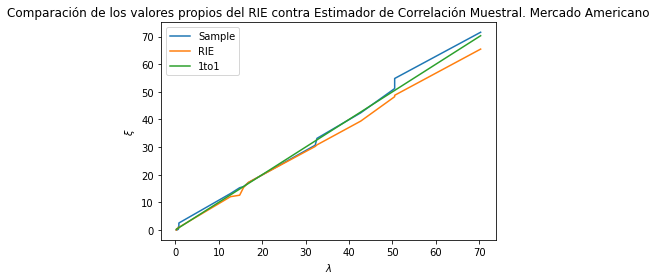

In [32]:
fig, ax = plt.subplots(1,1)
ax.plot(eigen_true,eigen_sample)
ax.plot(eigen_true,eigen_rie)
ax.plot(eigen_true,eigen_true)
#ax = sns.lineplot(x = eigen_true, y = eigen_sample)
#ax = sns.lineplot(x = eigen_true, y = eigen_rie)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', "1to1"])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


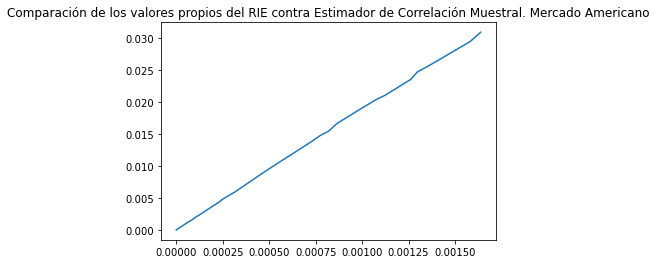

In [33]:
ax = sns.lineplot(x = eigen_sample[:30], y = eigen_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


### Simulación q = 1 sin estandarización

In [140]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 800
num_simul = 25

In [141]:
%%capture --no-stderr
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

/home/dum/Documents/rie_estimator/rie_estimator.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sq = (n_lambda)/(1 - np.sqrt(q))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_plus = n_lambda*((1+np.sqrt(q))/(1 - np.sqrt(q)))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in double_scalars
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in true_divide
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)


In [142]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

27.819207005118905
24.49857458186448
0.4219347260662658
3.0805351580216564


In [143]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [144]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

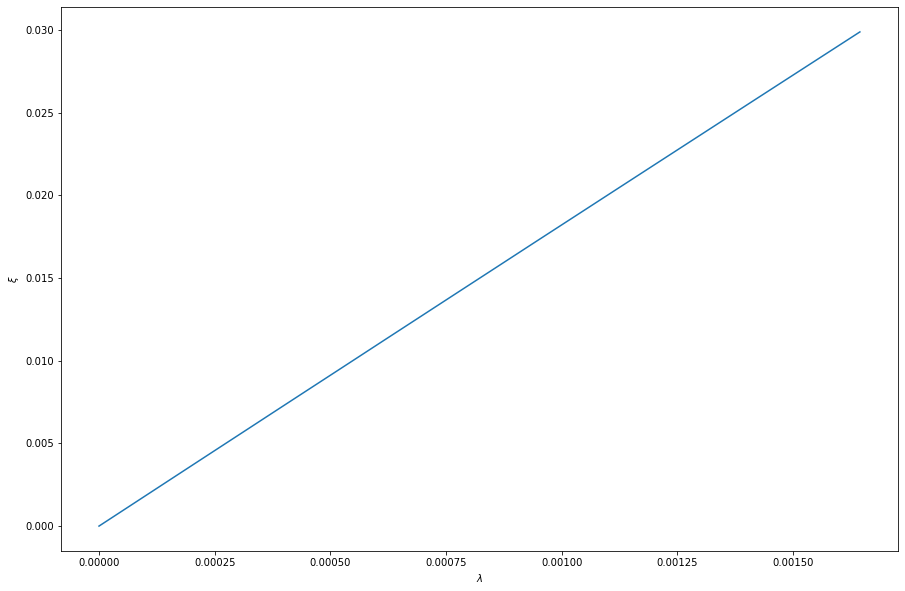

In [145]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


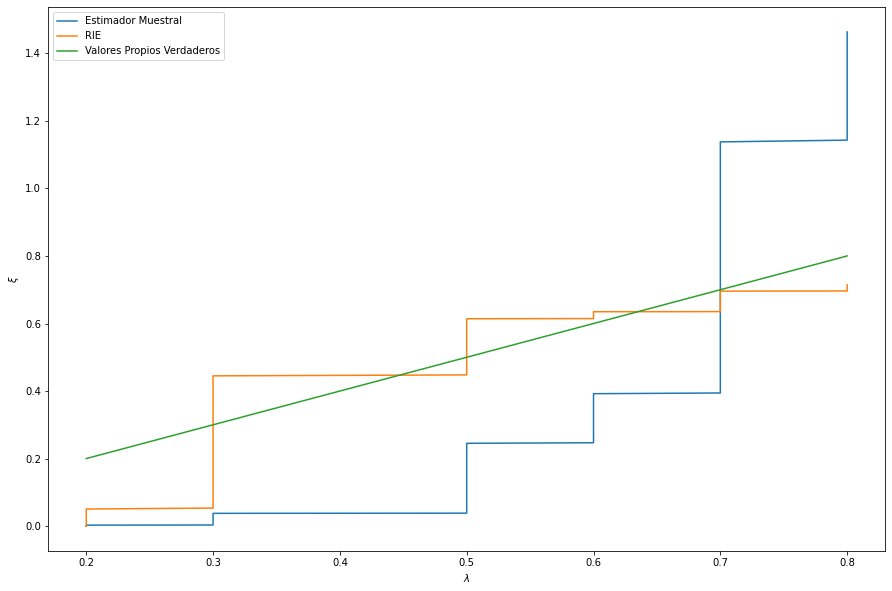

In [146]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


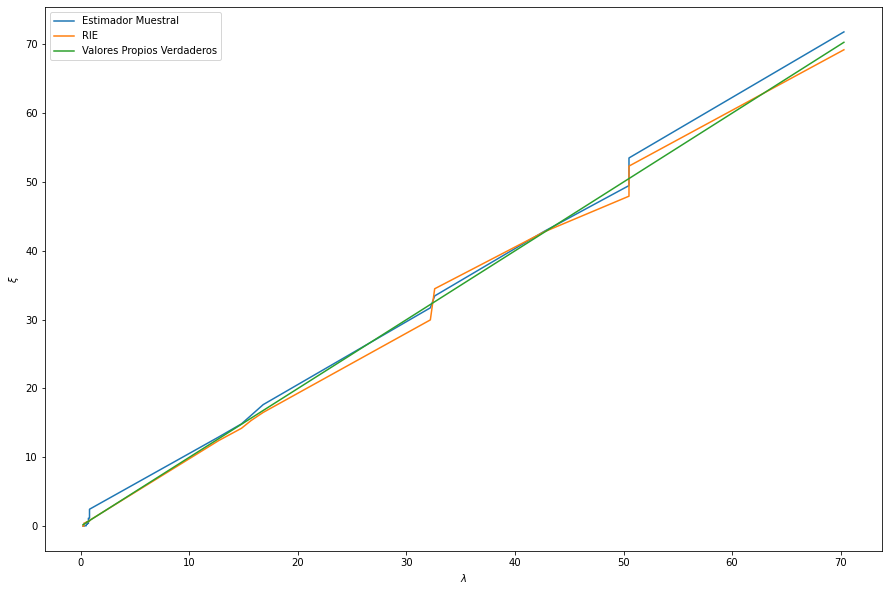

In [147]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


### Simulación con  q = 1 y con estandarizacion

In [148]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 800
num_simul = 10

In [149]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [150]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

/home/dum/Documents/rie_estimator/rie_estimator.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sq = (n_lambda)/(1 - np.sqrt(q))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_plus = n_lambda*((1+np.sqrt(q))/(1 - np.sqrt(q)))**2
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in double_scalars
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)
/home/dum/Documents/rie_estimator/rie_estimator.py:48: RuntimeWarning: invalid value encountered in true_divide
  g_mp = (z_k + sigma_sq*(q-1) - (np.sqrt(z_k - n_lambda)


In [151]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_muestral) - np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

27.57611506824229
24.459473111144217
0.5824022898494731
0.9314523893350168


In [152]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(10, 800)

In [153]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

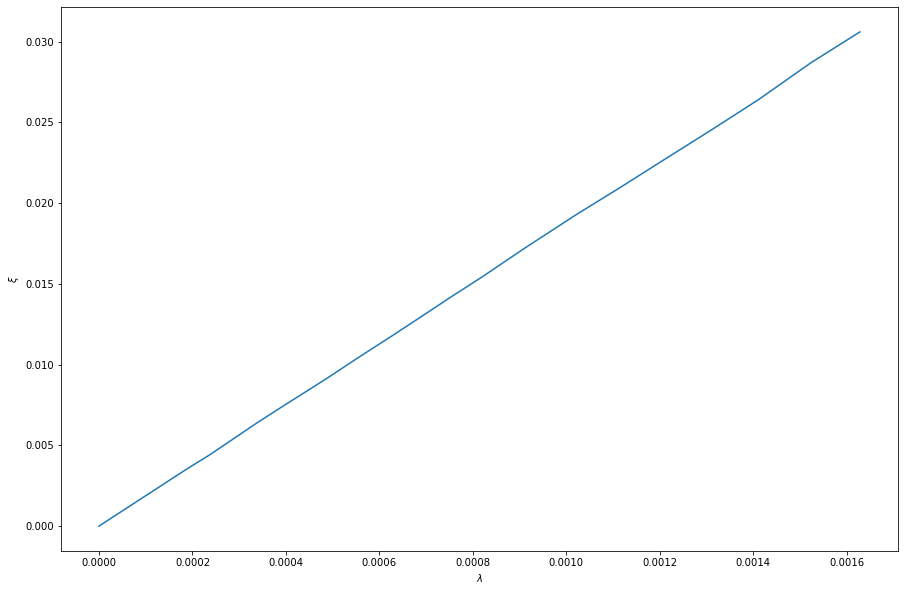

In [154]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$ y estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


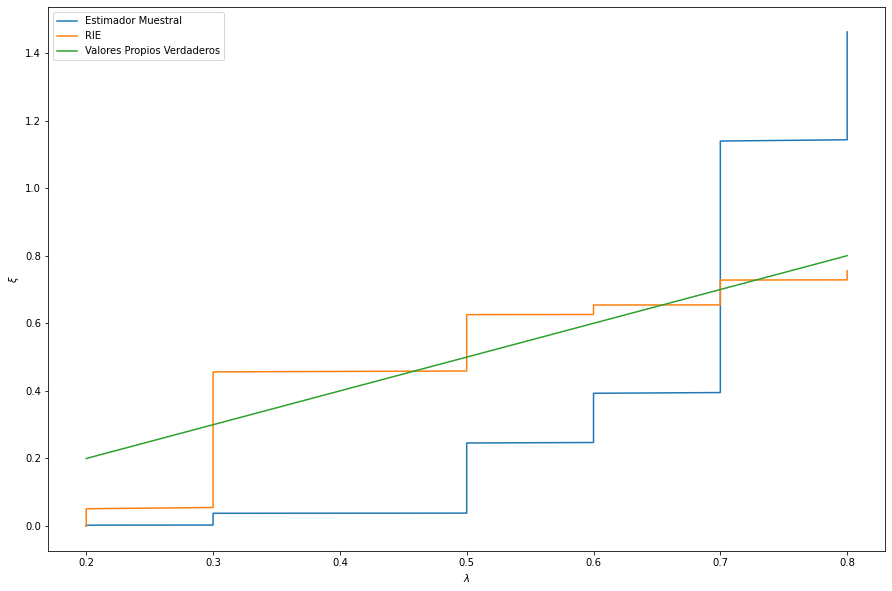

In [155]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


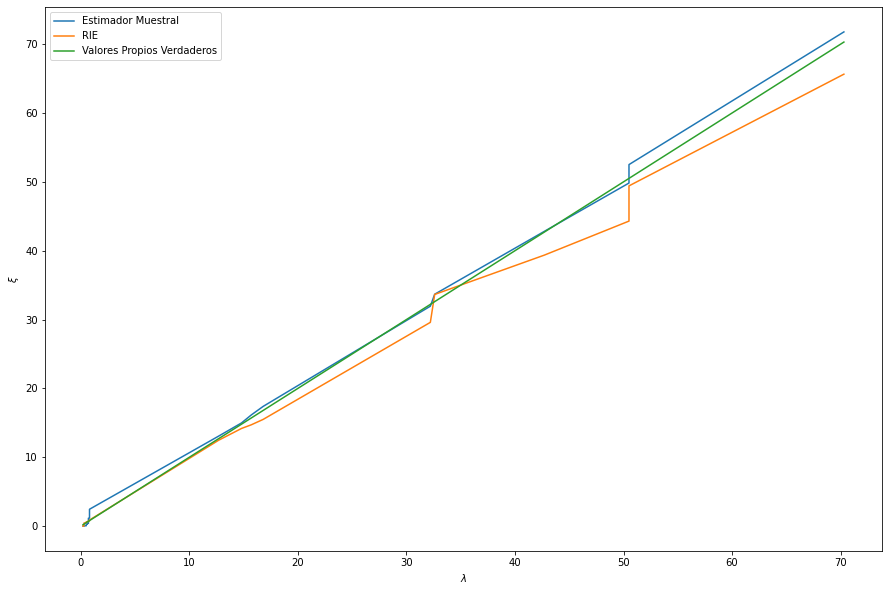

In [156]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización)")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


### Simulación con $q \approx 1$ y sin estandarización

In [191]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 900
num_simul = 25

In [192]:
%%capture --no-stderr
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [193]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

25.98035108862965
21.76818456592796
0.4367149906144316
1.618336363714881


In [194]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [195]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

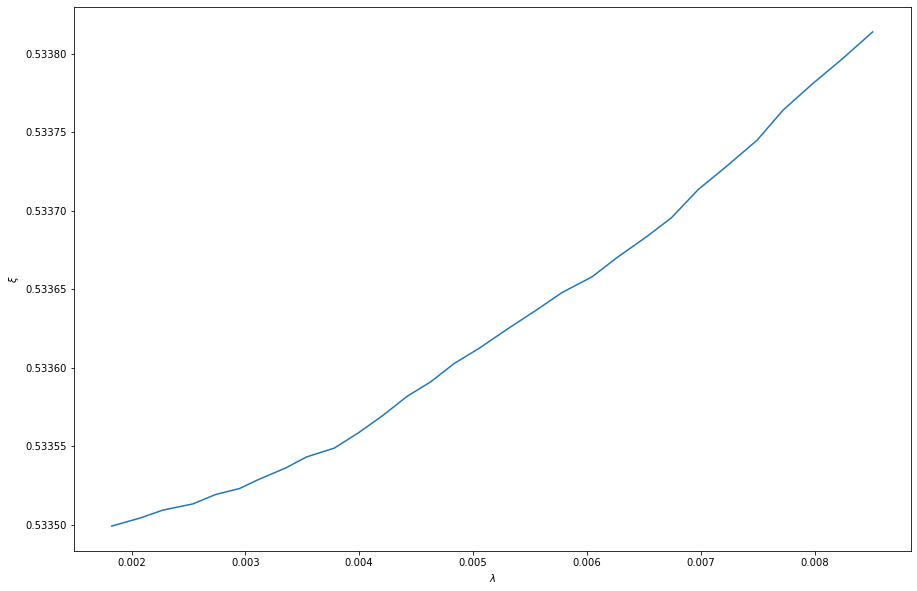

In [196]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


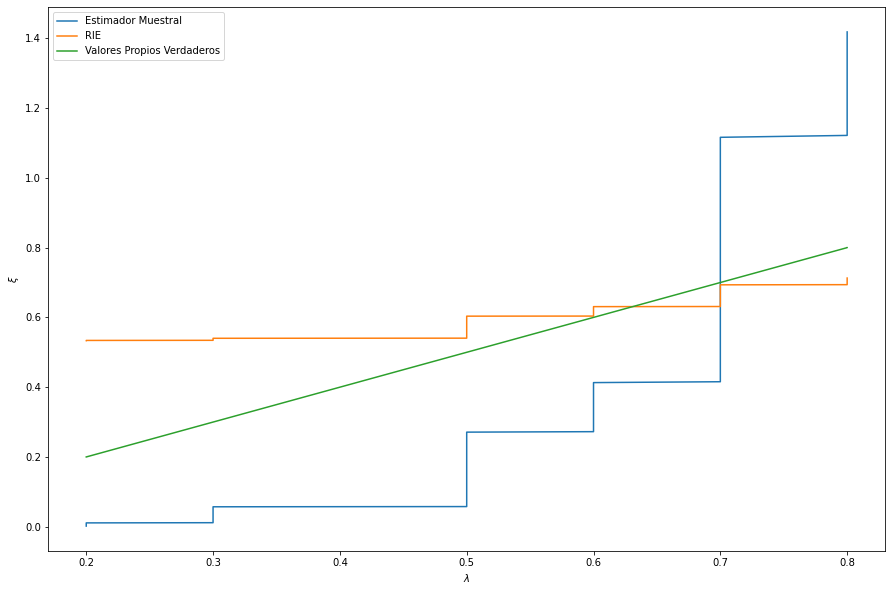

In [197]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


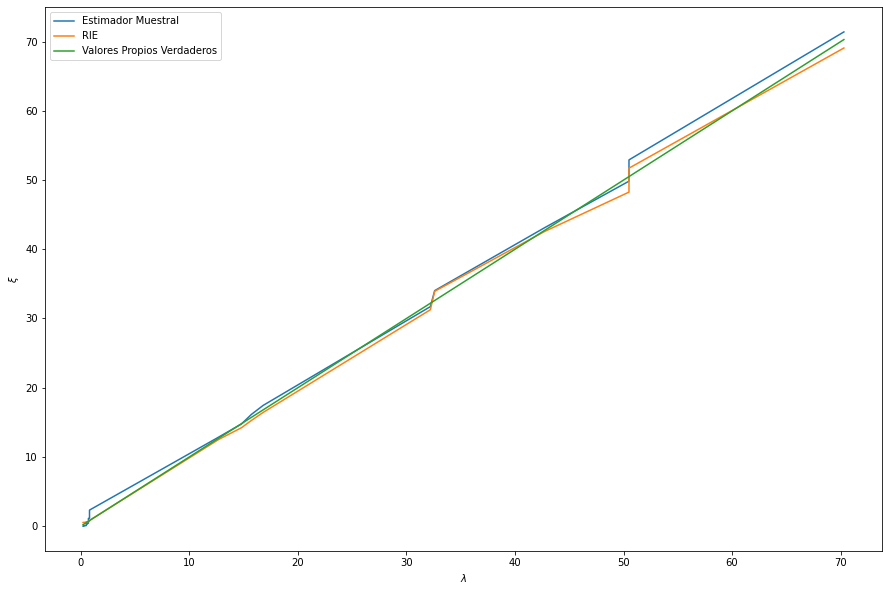

In [198]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


### Simulación con $q \approx 1$ y con estandarización

In [199]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 900
num_simul = 10

In [200]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [201]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [202]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_muestral) - np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

25.80665302930355
22.240882908830613
0.4130497572420477
1.035330194122974


In [203]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(10, 800)

In [204]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

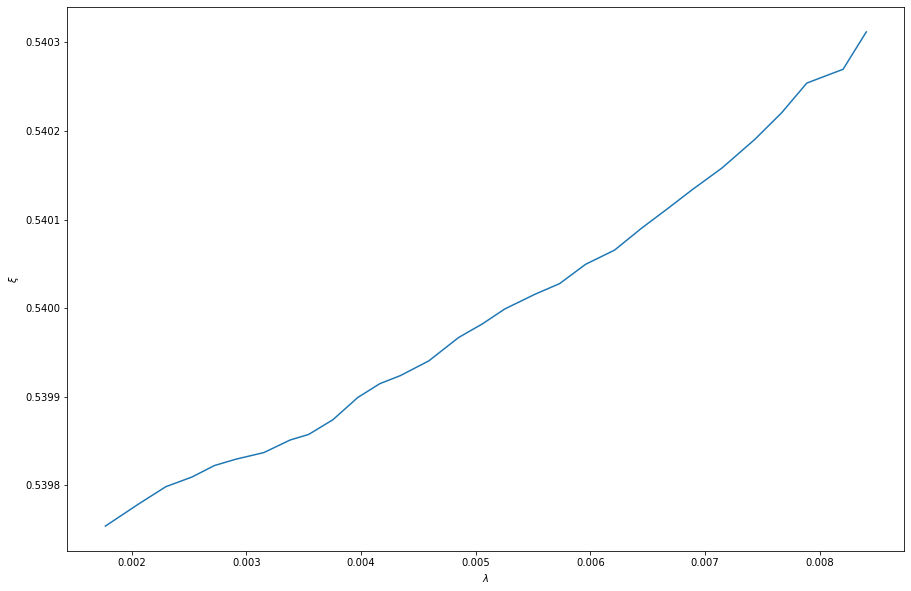

In [205]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$ y estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


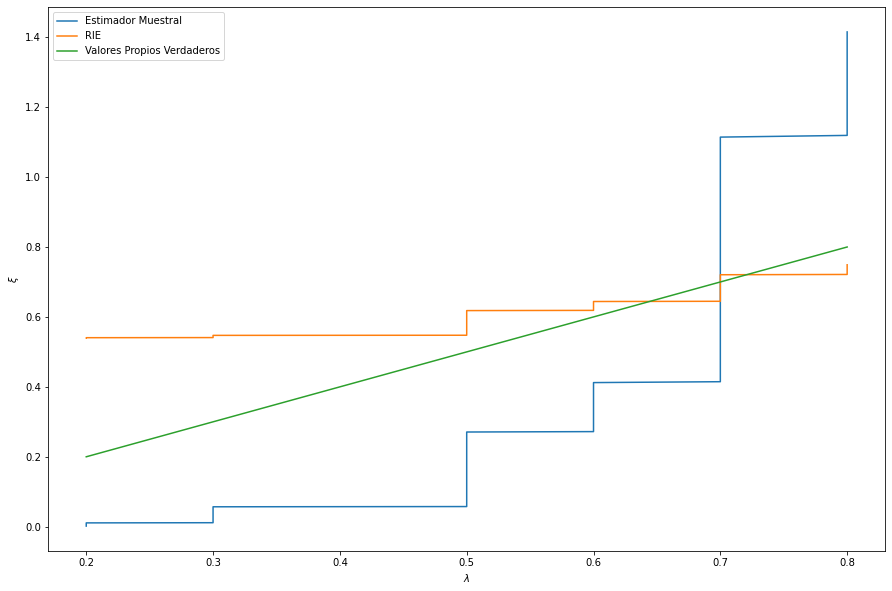

In [206]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


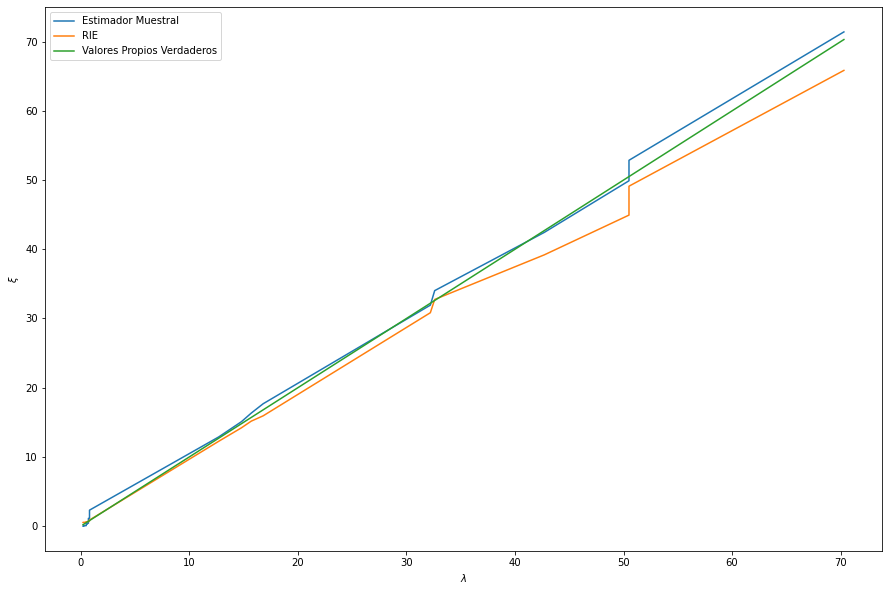

In [207]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización)")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


### Simulación con q = 1/2 sin estandarizacion

In [157]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 1600
num_simul = 25

In [158]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [159]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_muestral) - np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

19.588662942262296
17.391713284418856
0.541179041697267
3.412309607550621


In [160]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [161]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

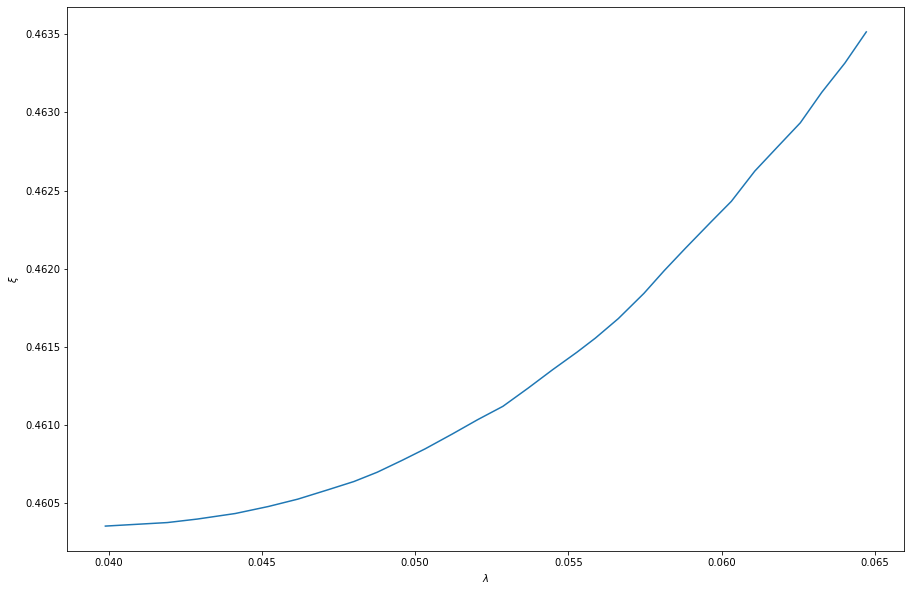

In [162]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1/2$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


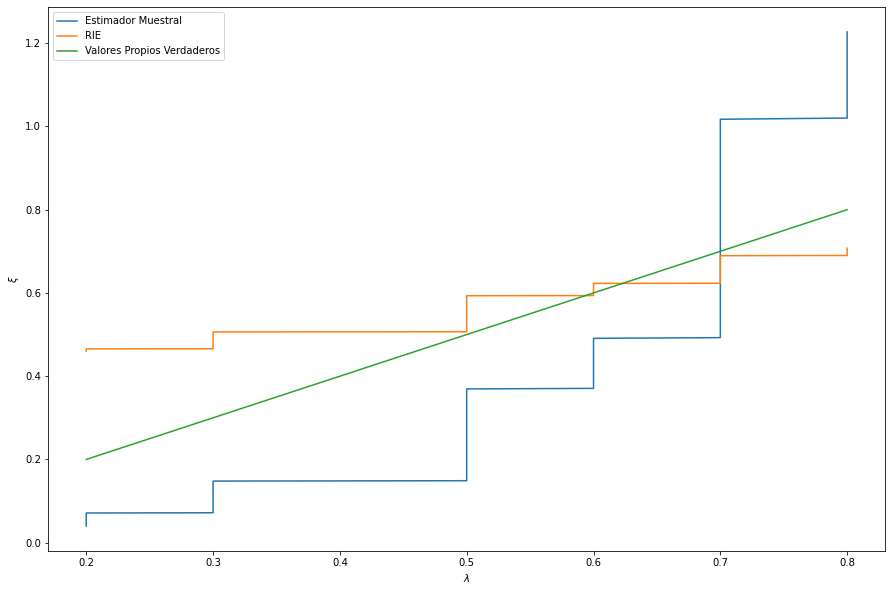

In [163]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales conq = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


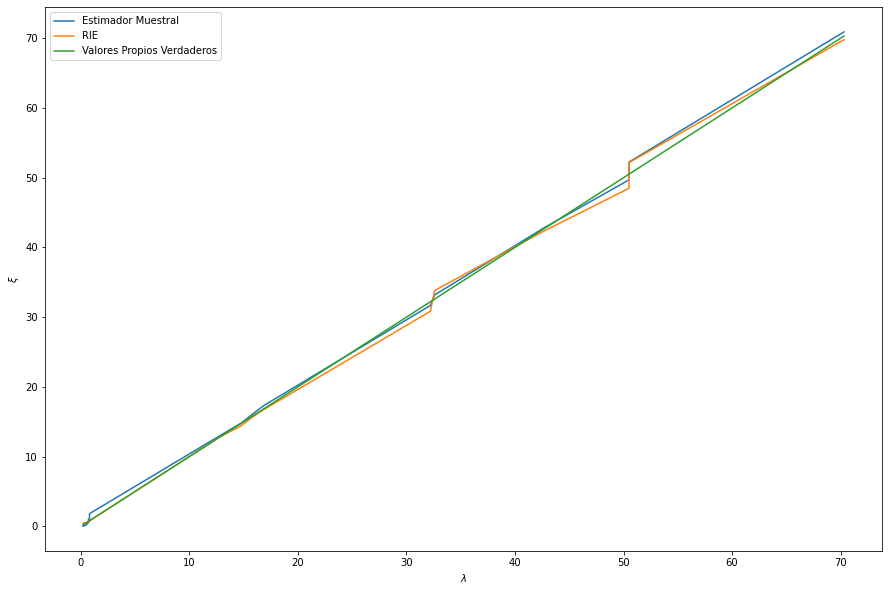

In [164]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

### Simulación con q = 1/2 y con estandarización

In [165]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 1600
num_simul = 25

In [166]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [167]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [168]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

19.662381947352145
18.281130218912505
0.44710425990124375
2.266043140213256


In [169]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [170]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

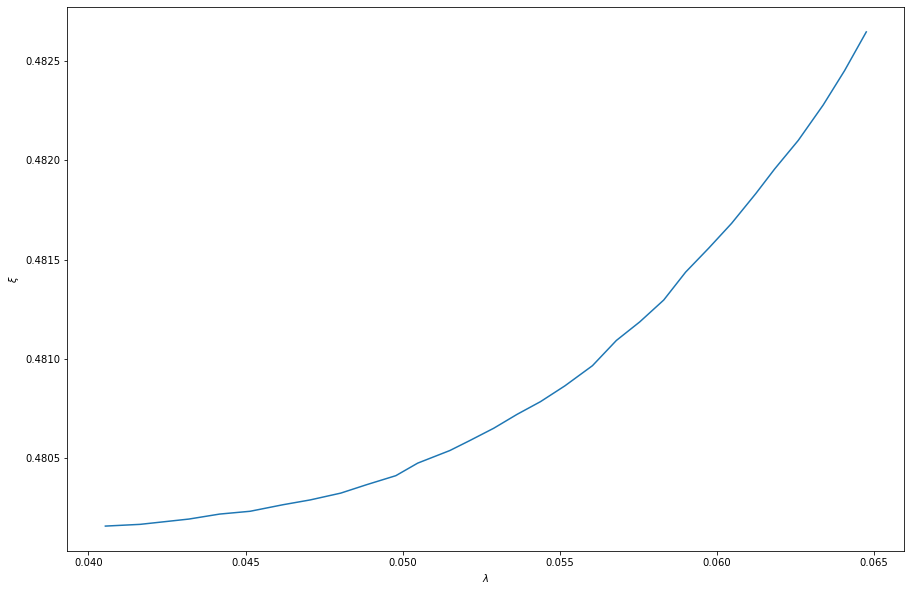

In [171]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1/2$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


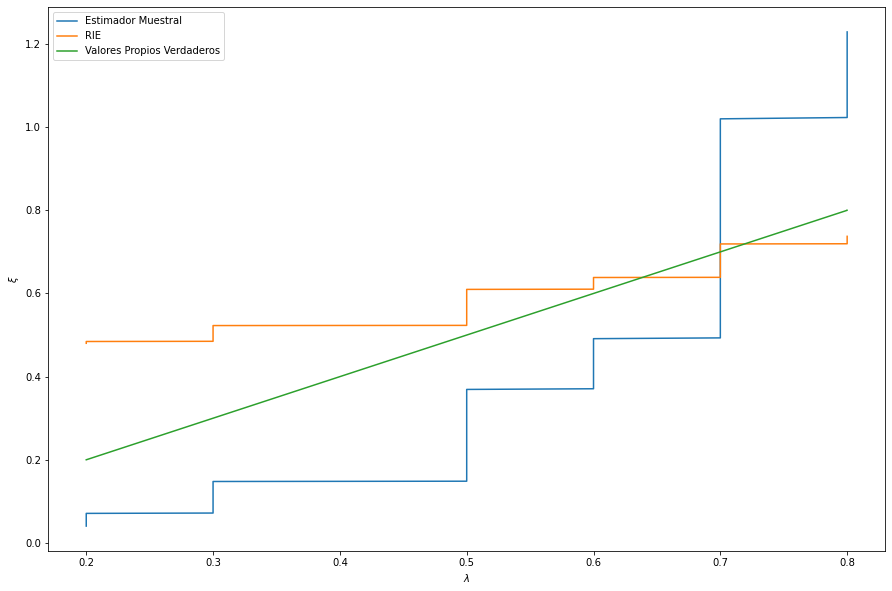

In [172]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales conq = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


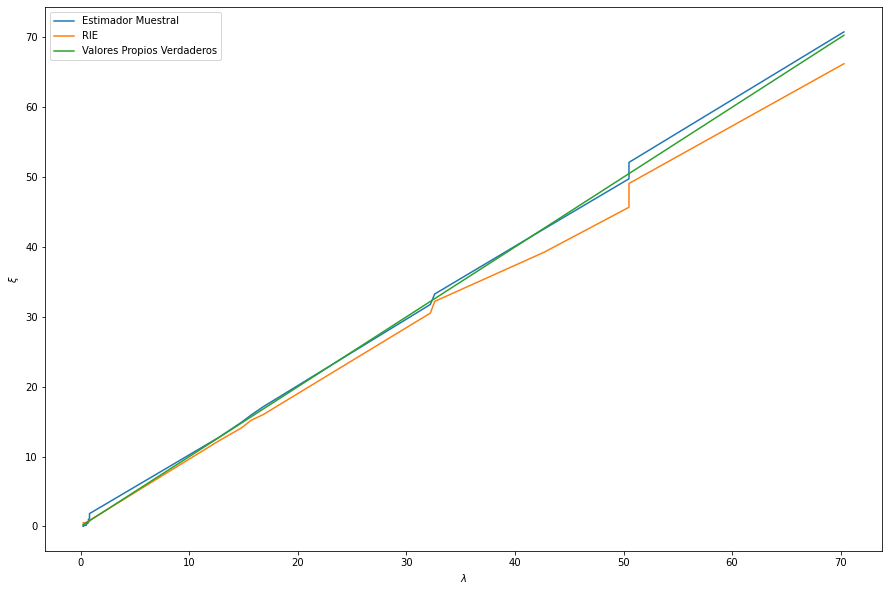

In [173]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

### Simulación con q = 1/4 y sin estandarización

In [175]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 3200
num_simul = 25

In [176]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [177]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

13.896629635442402
12.123408811304193
0.2659889399222635
0.4618712961434985


In [178]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [179]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

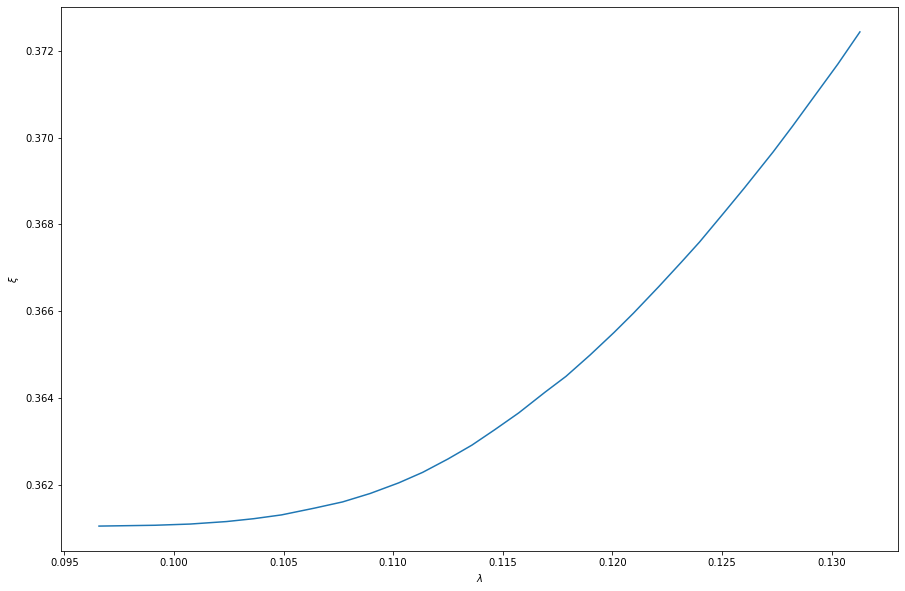

In [180]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1/2$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


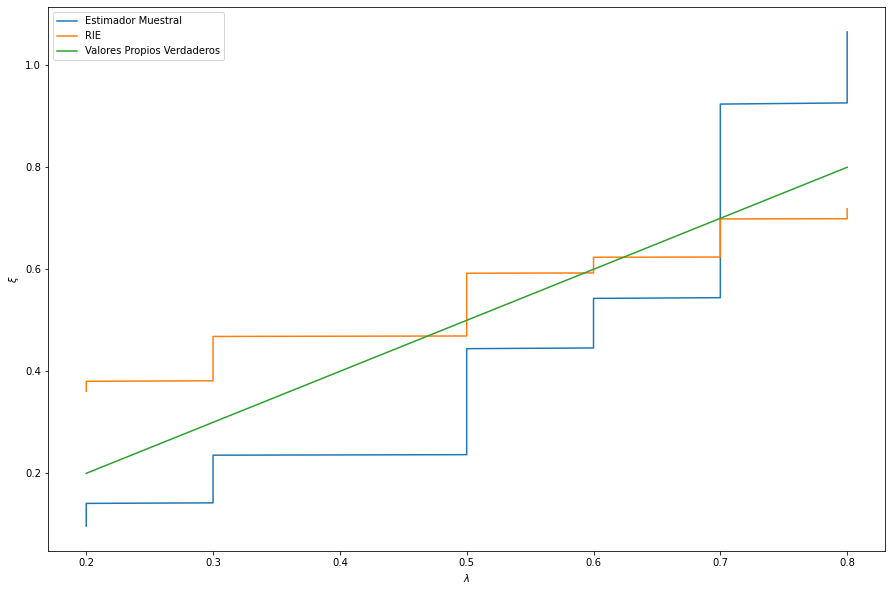

In [181]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales conq = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


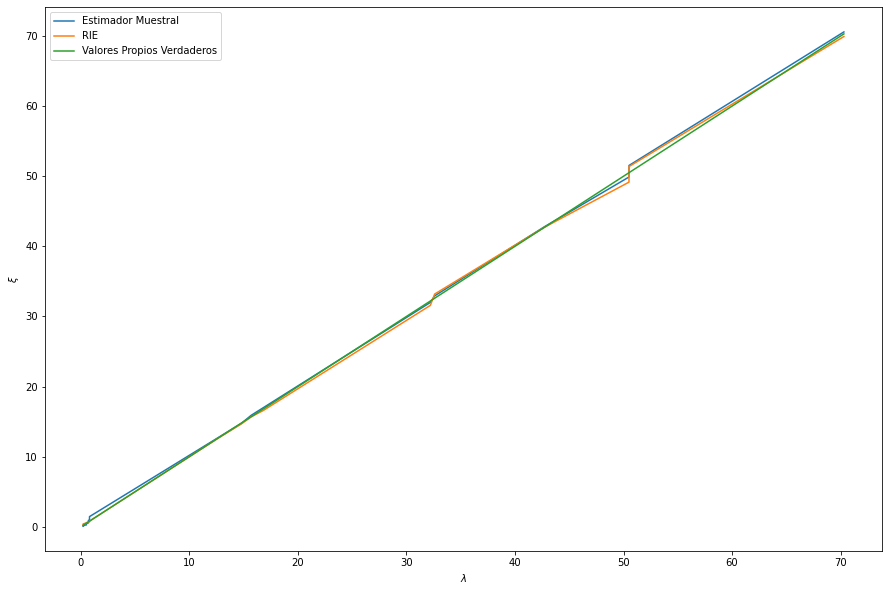

In [182]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

### Simulación con q = 1/4 y con estandarización

In [ ]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 3200
num_simul = 25

In [183]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [184]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [185]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.std(frob_muestral))
print(np.std(frob_rie))

13.924062664533615
13.463870725184881
0.3592948341751187
0.3834098254702571


In [186]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(25, 800)

In [187]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

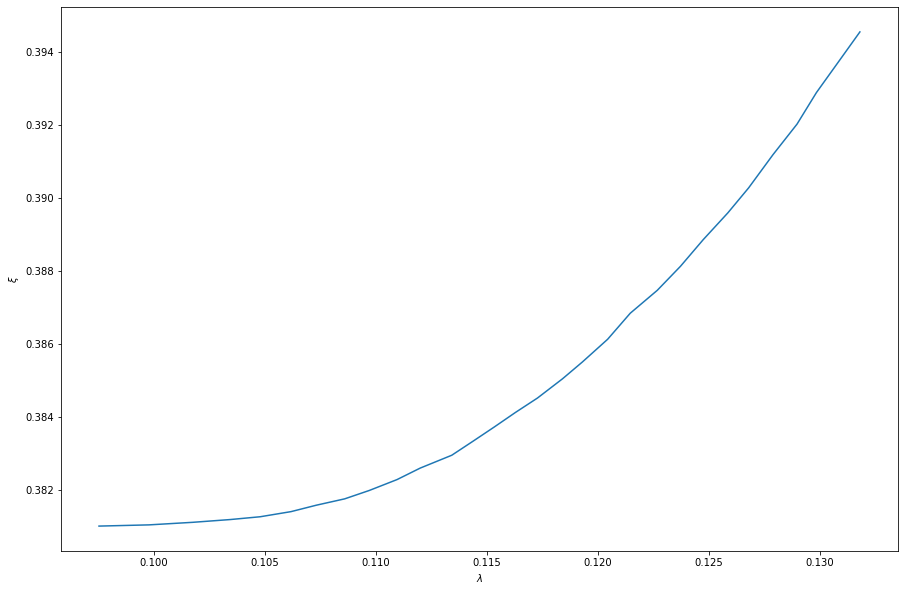

In [188]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1/2$")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


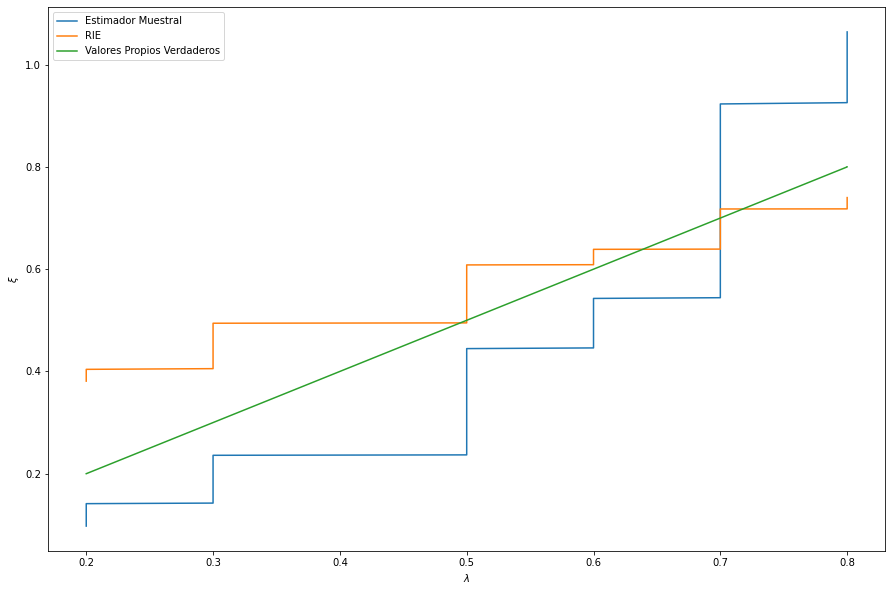

In [189]:
#plt.title("Comparación de los primeros 700 valores propios verdaderos vs valores propios RIE y valores propios muestrales conq = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:700], means_vals_propios_muestral[:700])
ax.plot( eigen_true[:700], means_vals_propios_rie[:700])
ax.plot(eigen_true[:700], eigen_true[:700])
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


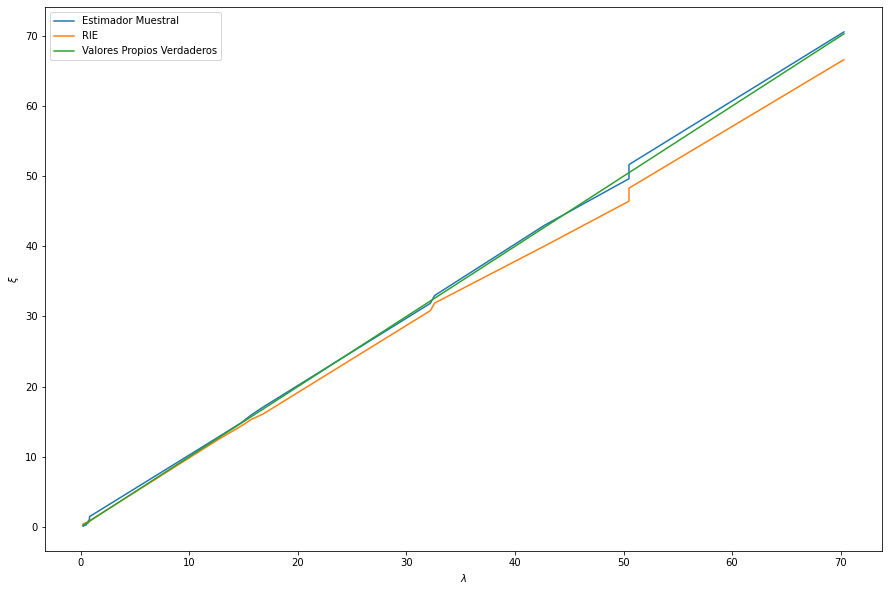

In [190]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales con q = 1/2")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot(eigen_true, eigen_true)
plt.legend(labels=['Estimador Muestral', 'RIE', 'Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()